In [1]:
import pandas as pd
df = pd.read_csv("Cleaned_spacex_weather.csv")
df

,lat,lon,temperature_2m,relative_humidity_2m,weathercode,wind_speed_10m,rocket,success,payloads,year,month,day,hour
0,9.047721,167.743129,26.4,77,2,33.9,0,0.0,28,2006,3,24,22
1,9.047721,167.743129,27.4,80,2,32.7,0,0.0,28,2007,3,21,1
2,9.047721,167.743129,27.2,79,1,22.0,0,0.0,56,2008,8,3,3
3,9.047721,167.743129,26.9,83,1,20.3,0,1.0,28,2008,9,28,23
4,9.047721,167.743129,27.3,86,3,28.5,0,1.0,28,2009,7,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,28.561857,-80.577366,21.5,88,2,9.9,1,0.0,2,2022,12,1,0
201,34.632093,-120.610829,21.5,88,2,9.9,1,0.0,28,2022,12,1,0
202,28.561857,-80.577366,21.5,88,2,9.9,1,0.0,28,2022,12,1,0
203,28.608058,-80.603956,21.5,88,2,9.9,2,0.0,2,2022,12,1,0


In [2]:
df.describe()

,lat,lon,temperature_2m,relative_humidity_2m,weathercode,wind_speed_10m,rocket,success,payloads,year,month,day,hour
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,28.987301,-80.386847,21.813659,75.756098,8.073171,12.607317,1.000000,0.882927,30.439024,2019.121951,6.629268,14.190244,11.858537
std,3.817182,41.797146,5.736972,15.764474,17.484714,5.937856,0.221404,0.322294,31.107379,3.256932,3.506174,8.951827,7.712003
min,9.047721,-120.610829,4.900000,27.000000,0.000000,2.200000,0.000000,0.000000,2.000000,2006.000000,1.000000,1.000000,0.000000
25%,28.561857,-80.603956,17.900000,67.000000,0.000000,8.200000,1.000000,1.000000,28.000000,2017.000000,4.000000,6.000000,4.000000
50%,28.561857,-80.577366,23.100000,78.000000,2.000000,11.800000,1.000000,1.000000,28.000000,2020.000000,6.000000,14.000000,14.000000
75%,28.608058,-80.577366,26.300000,88.000000,3.000000,15.800000,1.000000,1.000000,28.000000,2022.000000,10.000000,22.000000,19.000000
max,34.632093,167.743129,34.300000,98.000000,65.000000,33.900000,2.000000,1.000000,448.000000,2022.000000,12.000000,31.000000,23.000000


In [3]:
df.isna().sum()

lat                     0
lon                     0
temperature_2m          0
relative_humidity_2m    0
weathercode             0
wind_speed_10m          0
rocket                  0
success                 0
payloads                0
year                    0
month                   0
day                     0
hour                    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lat                   205 non-null    float64
 1   lon                   205 non-null    float64
 2   temperature_2m        205 non-null    float64
 3   relative_humidity_2m  205 non-null    int64  
 4   weathercode           205 non-null    int64  
 5   wind_speed_10m        205 non-null    float64
 6   rocket                205 non-null    int64  
 7   success               205 non-null    float64
 8   payloads              205 non-null    int64  
 9   year                  205 non-null    int64  
 10  month                 205 non-null    int64  
 11  day                   205 non-null    int64  
 12  hour                  205 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 20.9 KB


# Visualization

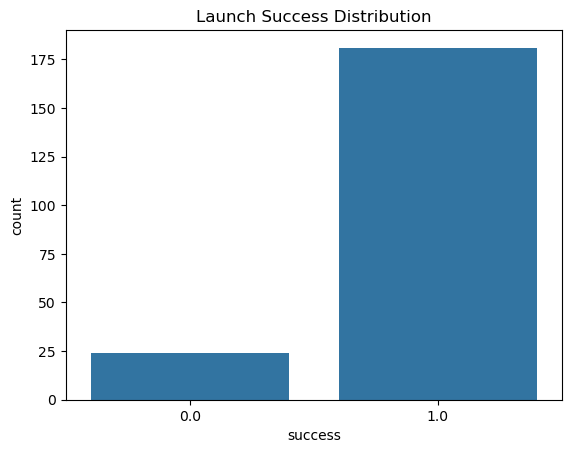

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



sns.countplot(data=df, x='success')
plt.title("Launch Success Distribution")
plt.show()

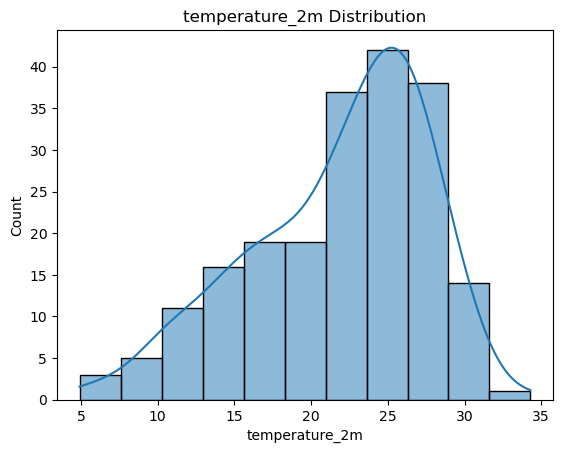

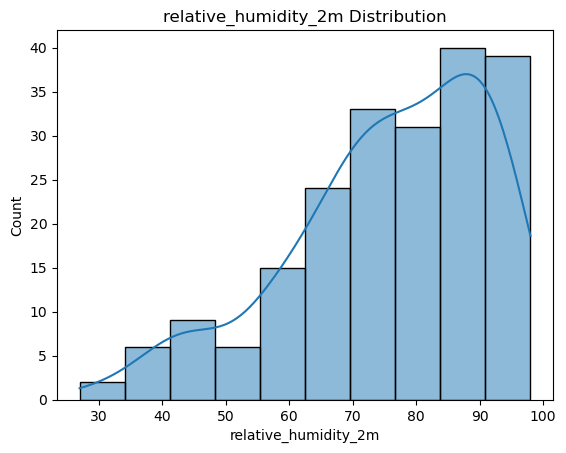

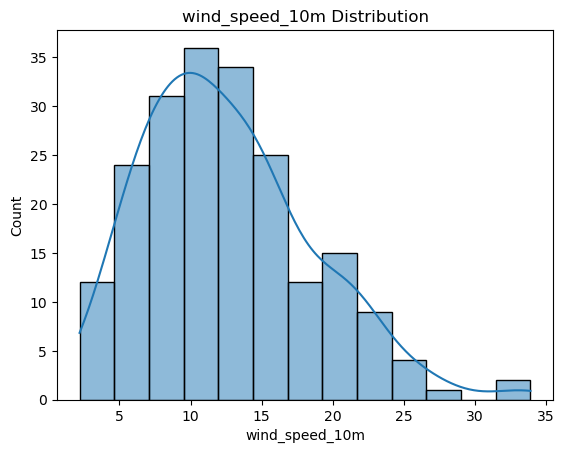

In [6]:
num_cols = ['temperature_2m', 'relative_humidity_2m', 'wind_speed_10m']
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

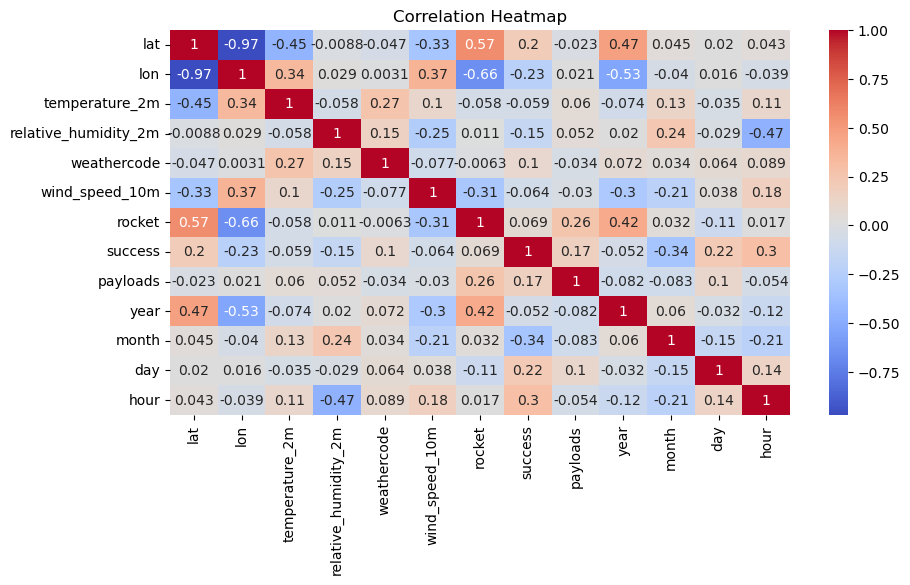

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

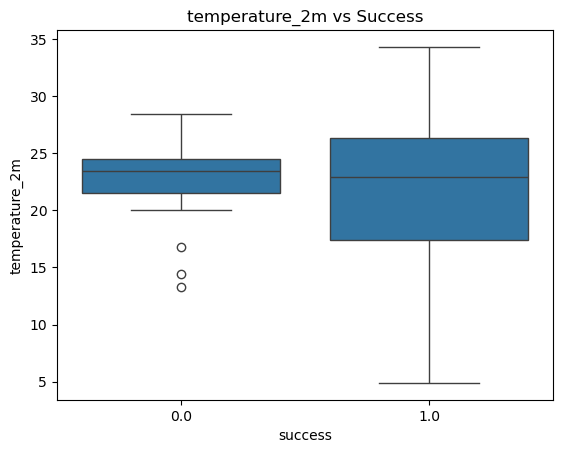

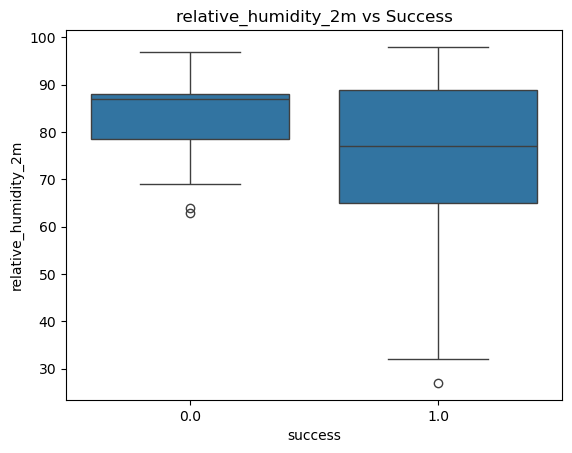

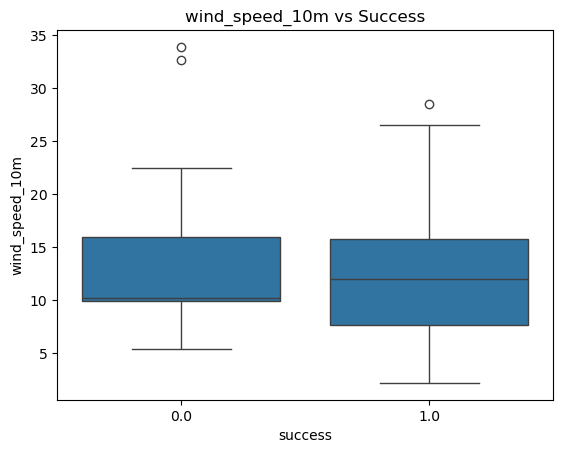

In [8]:
# Boxplots: Distribution of features by success
for col in ['temperature_2m', 'relative_humidity_2m', 'wind_speed_10m']:
    plt.figure()
    sns.boxplot(x='success', y=col, data=df)
    plt.title(f"{col} vs Success")


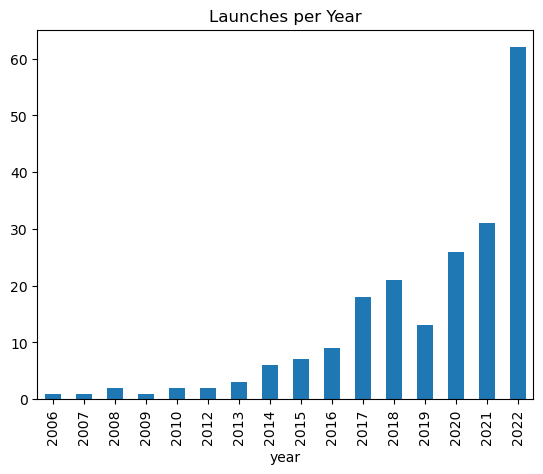

In [9]:
# Launches per year
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Launches per Year")
plt.show()

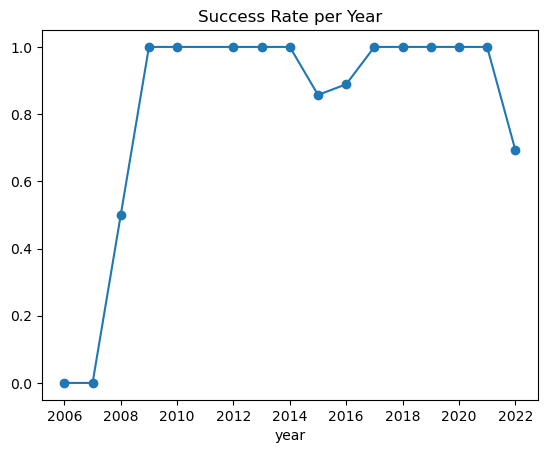

In [10]:
# Success rate per year
plt.figure()
success_rate_per_year = df.groupby('year')['success'].mean()
success_rate_per_year.plot(marker='o')
plt.title("Success Rate per Year")
plt.show()

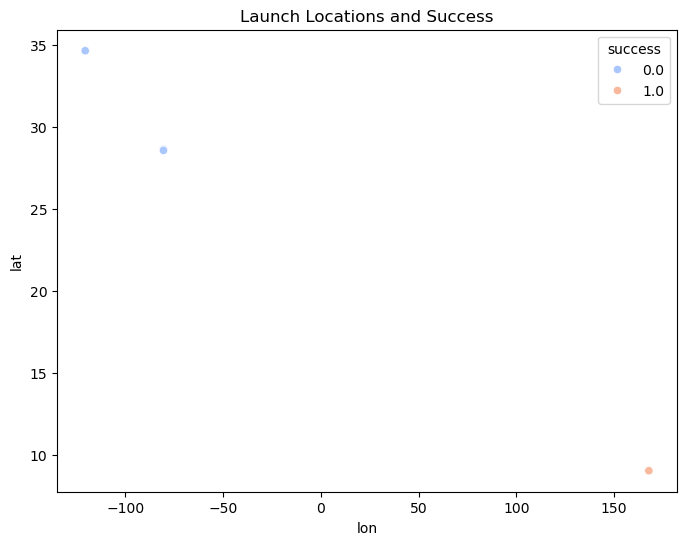

In [11]:
# Launch locations (color = success)
plt.figure(figsize=(8,6))
sns.scatterplot(x='lon', y='lat', hue='success', data=df, palette='coolwarm')
plt.title("Launch Locations and Success")
plt.show()

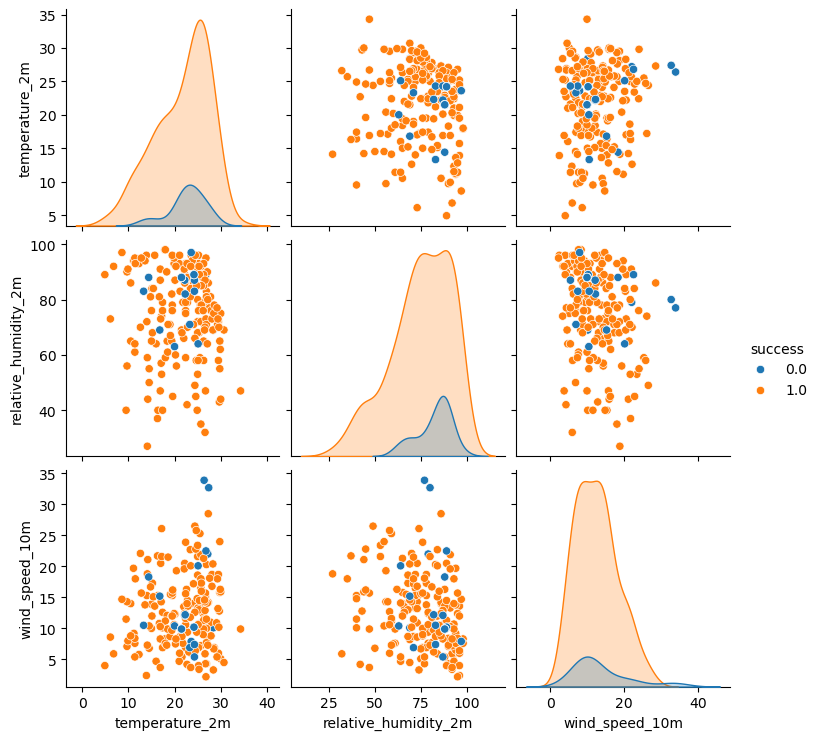

In [12]:
# Pairplot to see overall patterns (warning: slow on large data)
sns.pairplot(df[['temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'success']], hue='success')
plt.show()

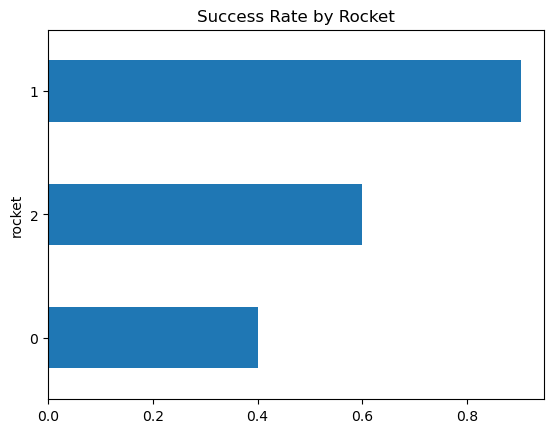

In [13]:
# Success rate by rocket
rocket_success = df.groupby('rocket')['success'].mean().sort_values()
rocket_success.plot(kind="barh")
plt.title("Success Rate by Rocket")
plt.show()


In [14]:
pip install folium

In [31]:
import folium

# Center the map at average location
center_lat = df['lat'].mean()
center_lon = df['lon'].mean()

launch_map = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# Add markers
for i, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color='green' if row['success'] == 1 else 'red',
        fill=True,
        fill_opacity=0.7,
        popup=f"Success: {row['success']}, Temp: {row['temperature_2m']}°C"
    ).add_to(launch_map)

launch_map.save("launch_map.html")
launch_map


In [47]:
import matplotlib

# Create base map
launch_map_temp = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=4)

# Temperature normalization for color
norm = matplotlib.colors.Normalize(vmin=df['temperature_2m'].min(), vmax=df['temperature_2m'].max())
cmap = matplotlib.colormaps['inferno']

# Add colored circle markers
for i, row in df.iterrows():
    temp_color = matplotlib.colors.rgb2hex(cmap(norm(row['temperature_2m'])))
    
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=temp_color,
        fill=True,
        fill_opacity=0.9,
        popup=f"Temp: {row['temperature_2m']}°C, Success: {row['success']}"
    ).add_to(launch_map_temp)
    
launch_map_temp.save("launch_map_temp.html")
launch_map_temp



In [39]:
from folium.plugins import MarkerCluster

cluster_map = folium.Map(location=[center_lat, center_lon], zoom_start=2)
marker_cluster = MarkerCluster().add_to(cluster_map)

for i, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Success: {row['success']}, Temp: {row['temperature_2m']}°C"
    ).add_to(marker_cluster)

cluster_map.save("cluster_map.html")
cluster_map
